In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import Generator, SeedSequence, MT19937
from statsmodels.graphics import tsaplots

In [2]:
def linearCongruentialEq(xn, a, c, m):
  return (a*xn + c) % m

def linearCongruential(x0, a, c, m, N):
  xn = x0
  rs = []
  xns = []

  for n in range(N):
    xn = linearCongruentialEq(xn, a, c, m)
    xns.append(xn)
    rs.append(xn/m)

  return rs, xns

def logisticEq(xn, r):
  return r*xn*(1 - xn)

def logistic(x0, r, N):
  xns = []
  xn = x0
  for i in range(N):
    xns.append(xn)
    xnp = logisticEq(xn, r)
    xn = xnp

  return xns

def histogram(data, bins):
  fig, ax = plt.subplots(1, 1)

  ax.hist(data, bins=bins)
  ax.set_title(f'Histograma n_bins={bins}')

def sequenceCorrelation(xns):
  xnps = xns[1:]

  fig, ax = plt.subplots(1, 1)
  ax.plot(xns[:-1], xnps, 'ro', color='black', markersize=1, linewidth=1)
  ax.set_title('Gráfico de correlação: $x_{n}$ por $x_{n+1}$')
    
def autocorrelation(data):
    tsaplots.plot_acf(data, lags=200, fft=False, zero=False, title='Autocorrelação')

Valor Esperado: 0.4971818079551131
Desvio Padrão: 0.28562169771057533


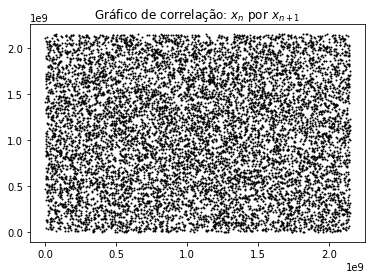

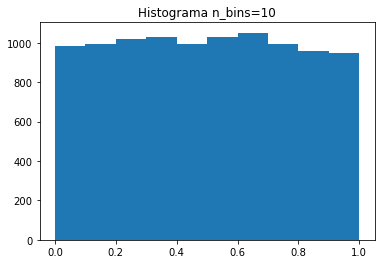

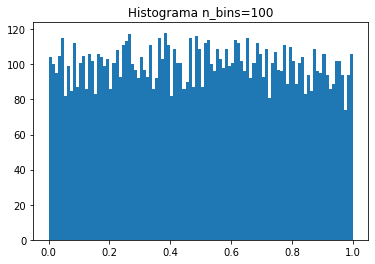

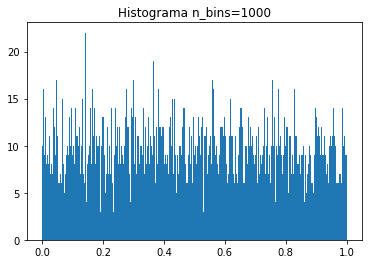

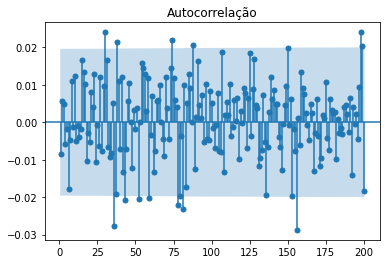

In [3]:
a = 7**5
c = 0
m = 2**31 - 1
x0 = 3141549
N = 10000

rs, xns = linearCongruential(x0, a, c, m, N)

print(f'Valor Esperado: {np.mean(rs)}')

print(f'Desvio Padrão: {np.std(rs)}')

sequenceCorrelation(xns)

bins = [10, 100, 1000]

for bin in bins:
  histogram(rs, bin)

autocorrelation(rs)

Valor Esperado: 0.4922375
Desvio Padrão: 0.28859641045064993


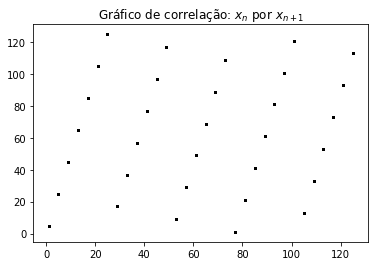

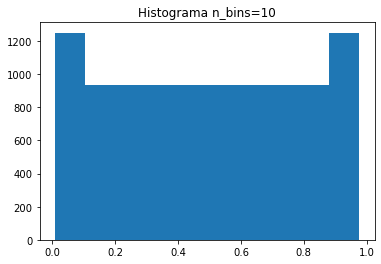

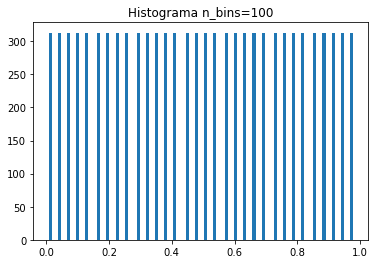

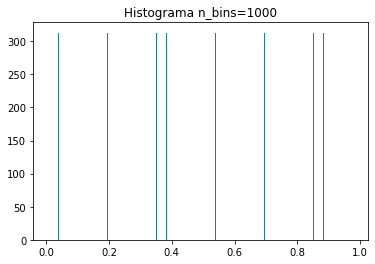

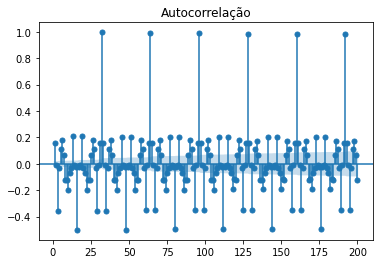

In [4]:
a = 5
c = 0
m = 2**7
x0 = 1
N = 10000

rs, xns = linearCongruential(x0, a, c, m, N)

print(f'Valor Esperado: {np.mean(rs)}')

print(f'Desvio Padrão: {np.std(rs)}')

sequenceCorrelation(xns)

bins = [10, 100, 1000]

for bin in bins:
  histogram(rs, bin)

autocorrelation(rs)

Valor Esperado: 0.5127396399313796
Desvio Padrão: 0.34550808412958917


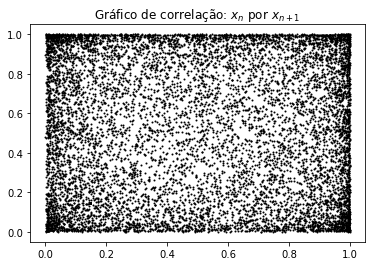

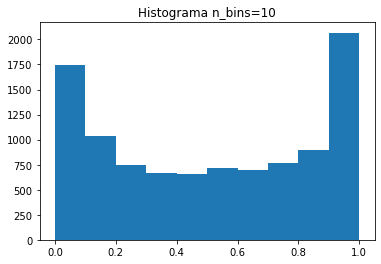

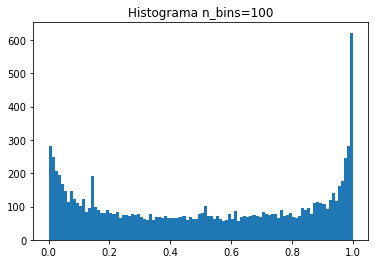

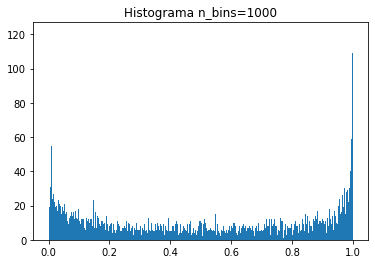

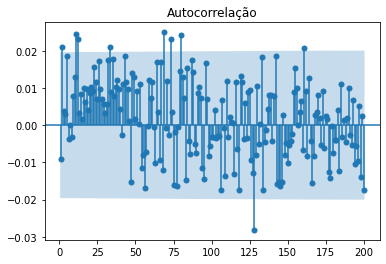

In [5]:
N = 10000
rs = np.linspace(3.99, 4, N, endpoint=False)
x0 = 0.5

rns = []

for r in rs:
    data = logistic(x0, r, 1000)
    rns.append(data[-1])
    
print(f'Valor Esperado: {np.mean(rns)}')

print(f'Desvio Padrão: {np.std(rns)}')

sequenceCorrelation(rns)

bins = [10, 100, 1000]

for bin in bins:
  histogram(rns, bin)

autocorrelation(rns)

Valor Esperado: 0.49712159756933416
Desvio Padrão: 0.2882065090601771


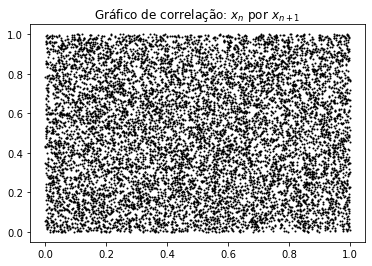

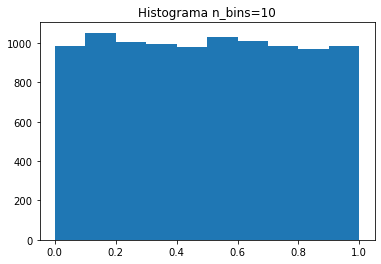

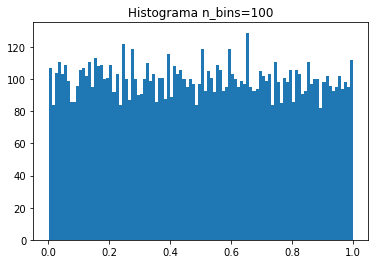

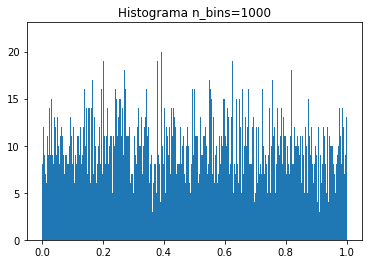

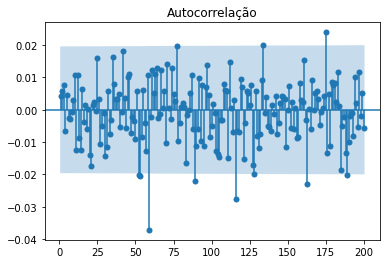

In [6]:
N = 10000
rng = np.random.default_rng(seed=42)
rns = rng.random(N)

print(f'Valor Esperado: {np.mean(rns)}')

print(f'Desvio Padrão: {np.std(rns)}')

sequenceCorrelation(rns)

bins = [10, 100, 1000]

for bin in bins:
  histogram(rns, bin)

autocorrelation(rns)

Valor Esperado: 0.5039964689624098
Desvio Padrão: 0.28779418044811766


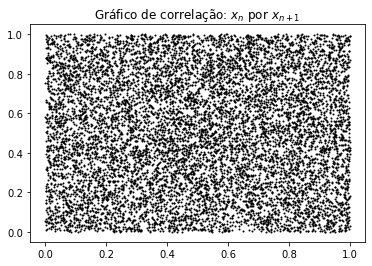

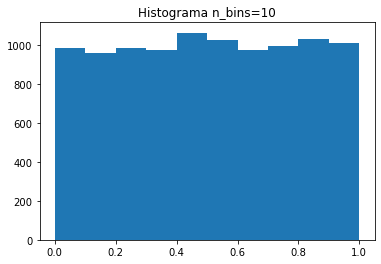

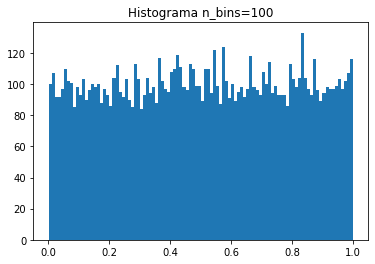

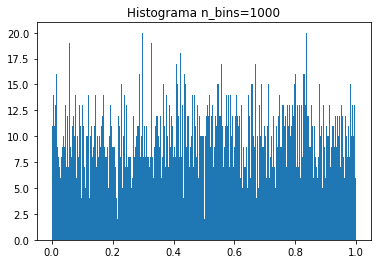

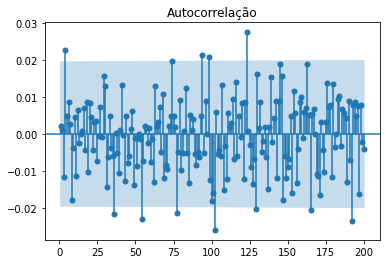

In [7]:
N = 10000
sg = SeedSequence(1234)
bg = MT19937(sg)
rg = Generator(bg)
rns = rg.random(N)

print(f'Valor Esperado: {np.mean(rns)}')

print(f'Desvio Padrão: {np.std(rns)}')

sequenceCorrelation(rns)

bins = [10, 100, 1000]

for bin in bins:
  histogram(rns, bin)

autocorrelation(rns)